In [ ]:
#to train EfficientAd based models
from anomalib.data import MVTec
from anomalib.models import EfficientAd
from anomalib.engine import Engine

#Loop through each category, tarained a model based on thaty category, then save the model state in trainedModels directory.
for category in ['grid', 'leather', 'tile'] :
    # Initialize components, the dataset will be downloaded if it does not exist on the root directory and we set category tobe used to traine the model
    # since we are using EfficientAd , we have to set the batch size to 1
    datamodule = MVTec(root = './dataset', category=category ,train_batch_size = 1)


    # Initialize the engine, i have set max_epochs = 14 to limit the  number of epochs to 13 because
    # the model was training behond 105 epochs and was sill running so to save time i limited the number of epochs
    engine = Engine(max_epochs = 14)

    # Initialize the efficientAd model
    model = EfficientAd()


    #Train the model
    engine.fit(datamodule=datamodule, model=model)


    # Save the trained model
    model.trainer.save_checkpoint(f'./trainedModels/efficientAd{category}.ckpt')
    print("trained")


In [ ]:

#Train patchore based model
from anomalib.data import MVTec
from anomalib.models import Patchcore
from anomalib.engine import Engine

for category in ['grid', 'leather', 'tile'] :
    # Initialize components
    # Initialize components, the dataset will be downloaded if it does not exist on the root directory and we set category to be used to traine the model
    #The MVTec  will return  a patchore class of the selected category
    datamodule = MVTec(root = './dataset', category=category)


    # Initialize the engine
    engine = Engine()

    # Initialize the Patchcore model
    model = Patchcore()


    #Train the model based
    engine.fit(datamodule=datamodule, model=model)


    # Save the trained model
    model.trainer.save_checkpoint(f'./trainedModels/patchCore{category}.ckpt')
    print("trained")


In [ ]:
from anomalib.data import MVTec
from anomalib.models import EfficientAd, Patchcore
from anomalib.engine import Engine

#differents categories of flat images
categories = ['grid', 'leather', 'tile']
#dictionary of pretrained model
modelClass = {'efficientAd' : EfficientAd, 'patchCore': Patchcore }

#dictionary to store aurocs values
aurocs = {}

#outer Loop through the diffent model and test the model on the different categories
for modelName in   modelClass:
    #get sum the Auroc accros all three image categories of the same model
    sumModelImageAuroc = 0
    sumModelPixelAuroc = 0
    #inner loop to test a model on the  'grid', 'leather', 'tile' categories
    for category in categories:
        #The two lines bellow are use to make a unique name by combining the  modelName + category in order to save the trained model state
        modelByCategory = f'{modelName}{category}'
        modelByCateoryPath = f'trainedModels/{modelByCategory}.ckpt'

        # Initialize components
        #The MVTec  will return  a patchore class of the selected category
        datamodule = MVTec(root = './dataset', category=category )


        # Initialize the engine
        engine = Engine()

        # load the trained model
        model = modelClass[modelName].load_from_checkpoint(modelByCateoryPath)


        #Test the model
        engine.test(datamodule=datamodule, model=model)

        # retieve the auroc from the tested model
        imageAuroc = engine.trainer.callback_metrics.get('image_AUROC')
        pixelAuroc = engine.trainer.callback_metrics.get('pixel_AUROC')

        #sum the Auroc accros all three image categories of the same model
        sumModelImageAuroc =sumModelImageAuroc + imageAuroc
        sumModelPixelAuroc = sumModelPixelAuroc + pixelAuroc
        #use the modelName + category as key and [imageAuroc, pixelAuroc] as its value
        aurocs[modelByCategory] = [imageAuroc, pixelAuroc]
    #store the average auroc of ctegories tile, leather, grid of the same model
    aurocs[f"average{modelName}Auroc"] = [sumModelImageAuroc/3, sumModelPixelAuroc/3 ]

    #display the auroc scores
    print("Table of auroc scores")
    print(f"\n{'modelByCategory':<30} {'imageAuroc':<20} {'pixelAuroc':<20}")
    for key in aurocs:
        print(f"{key:<30} {aurocs[key][0]:<20.2f} {aurocs[key][1]:<20.2f}")




INFO:anomalib.models.components.base.anomaly_module:Initializing EfficientAd model.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.


Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 88.55547404289246 seconds
Throughput (batch_size=32) : 0.8808038220451528 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9899749755859375     │
│       image_F1Score       │    0.9821428656578064     │
│        pixel_AUROC        │    0.9260274171829224     │
│       pixel_F1Score       │    0.5019165277481079     │
└───────────────────────────┴───────────────────────────┘

INFO:anomalib.models.components.base.anomaly_module:Initializing EfficientAd model.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.


Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 161.34148693084717 seconds
Throughput (batch_size=32) : 0.7685561993930788 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │     0.90964674949646      │
│       image_F1Score       │    0.9005848169326782     │
│        pixel_AUROC        │    0.9685078859329224     │
│       pixel_F1Score       │    0.5685606002807617     │
└───────────────────────────┴───────────────────────────┘

INFO:anomalib.models.components.base.anomaly_module:Initializing EfficientAd model.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.


Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 440.09077048301697 seconds
Throughput (batch_size=32) : 0.26585424609470426 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9996392130851746     │
│       image_F1Score       │     0.988095223903656     │
│        pixel_AUROC        │    0.9031358957290649     │
│       pixel_F1Score       │    0.7368753552436829     │
└───────────────────────────┴───────────────────────────┘

Table of auroc scores

modelByCategory                imageAuroc           pixelAuroc          
efficientAdgrid                0.99                 0.93                
efficientAdleather             0.91                 0.97                
efficientAdtile                1.00                 0.90                
averageefficientAdAuroc        0.97                 0.93                


INFO:anomalib.models.components.base.anomaly_module:Initializing Patchcore model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
INFO:anomalib.engine.engine:Overriding max_epochs from 14 with 1 for Patchcore
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.


Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 58.94940257072449 seconds
Throughput (batch_size=32) : 1.3231686259486612 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9807853102684021     │
│       image_F1Score       │    0.9642857313156128     │
│        pixel_AUROC        │    0.9792911410331726     │
│       pixel_F1Score       │    0.3768638074398041     │
└───────────────────────────┴───────────────────────────┘

INFO:anomalib.models.components.base.anomaly_module:Initializing Patchcore model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
INFO:anomalib.engine.engine:Overriding max_epochs from 14 with 1 for Patchcore
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.


Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 83.66613602638245 seconds
Throughput (batch_size=32) : 1.4820811129714306 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │     0.994535505771637     │
│        pixel_AUROC        │    0.9899119138717651     │
│       pixel_F1Score       │    0.4411308169364929     │
└───────────────────────────┴───────────────────────────┘

INFO:anomalib.models.components.base.anomaly_module:Initializing Patchcore model.
INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/wide_resnet50_2.racm_in1k)
INFO:timm.models._hub:[timm/wide_resnet50_2.racm_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO:timm.models._builder:Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
INFO:anomalib.engine.engine:Overriding max_epochs from 14 with 1 for Patchcore
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
INFO:anomalib.data.image.mvtec:Found the dataset.


Testing: |          | 0/? [00:00<?, ?it/s]

INFO:anomalib.callbacks.timer:Testing took 79.75338697433472 seconds
Throughput (batch_size=32) : 1.4670223352100589 FPS


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9888167381286621     │
│       image_F1Score       │    0.9818181991577148     │
│        pixel_AUROC        │    0.9477174878120422     │
│       pixel_F1Score       │    0.6203445196151733     │
└───────────────────────────┴───────────────────────────┘

Table of auroc scores

modelByCategory                imageAuroc           pixelAuroc          
efficientAdgrid                0.99                 0.93                
efficientAdleather             0.91                 0.97                
efficientAdtile                1.00                 0.90                
averageefficientAdAuroc        0.97                 0.93                
patchCoregrid                  0.98                 0.98                
patchCoreleather               1.00                 0.99                
patchCoretile                  0.99                 0.95                
averagepatchCoreAuroc          0.99                 0.97                


Found 276 files belonging to 2 classes.


2025-03-03 03:14:46.294622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


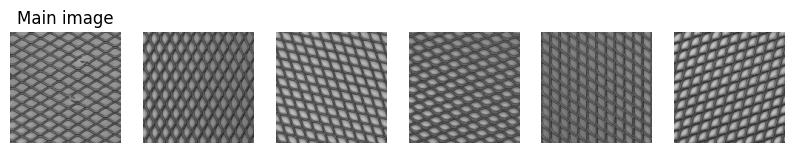

In [ ]:
from keras import layers, models
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
# Build the model of multiple layers
#Relu helps produce values > 0
model = models.Sequential()
#convulitional layer with kermel size 3 X 3 and 32 kernels. Image input shape is 150 X 150 and in RGB
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
#Maxpooling 2X2 reduce the previous feature sizeby half by taking the max values between the kernels
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
#Dense helps to corelate between all the neurons to learn features of the data. In this case weuse 100 neurons
model.add(layers.Dense(100, activation='relu'))


# Load the images
folderPath =os.path.abspath("./similaritySearchDataset")
#resize the image by 150 X 150 and set the bach size to 32.
images = tf.keras.utils.image_dataset_from_directory(
    folderPath, image_size=(150, 150), batch_size=32
)

#Get filepath of images
#store image urls
filepaths = []
#outer loop retun the subfolders in tthe image ain folder
for file in os.listdir(folderPath):
    #inner loop retunr the images in each subfolders
    for subfile in os.listdir(os.path.join(folderPath, file)):
        #append the imge path
        filepaths.append(os.path.join(folderPath, file, subfile))

# Rescale the images so that that values is between 0 and 1
rescaleImages = images.map(lambda x, y: (x / 255.0))

# Extract embeddings from images
def extractEmbeddings(scaledImages, model):
    embeddings = []
    for images in scaledImages:
        #get the features of the image
        emb = model(images)
        #append the features as a numpy  array
        embeddings.append(emb.numpy())
    #reshape the embeddings by creating a 2d array of embeddings
    return np.concatenate(embeddings, axis=0)

#get the embeddings of all images
imagesEmbeddings = extractEmbeddings(rescaleImages, model)

# Similarity search function
def similaritySearch(queryImagePath, imagesEmbeddings, model, topK=5):
    # Load the queryImaage, resize it 10 150X150
    resizeQueryImage = tf.keras.preprocessing.image.load_img(queryImagePath, target_size=(150, 150))
    #convert the image into a numpy array
    imageToArray = tf.keras.preprocessing.image.img_to_array(resizeQueryImage)
    #Rescale the queryImage so that that values is between 0 and 1
    rescaledQueryImage = imageToArray / 255.0
    queryImage = np.expand_dims(rescaledQueryImage, axis=0)

    # Get the query image embedding as a numpy array
    queryImageEmbedding = model(queryImage).numpy()

    # #Compute cosine similarity score of every image vs the qeryImage
    #get the dot producty of every image vs the qeryImage
    dot_product = np.dot(imagesEmbeddings, queryImageEmbedding.T).flatten()
    #compute magnitude of each image embedding times the queryImage embedding
    norms = np.linalg.norm(imagesEmbeddings, axis=1) * np.linalg.norm(queryImageEmbedding)
    #divide every dot product by norms
    cosine_similarity = dot_product / norms

    # Get top K most similar images
    topKIndices = cosine_similarity.argsort()[-topK:][::-1]
    #store the url of the top k images
    similarIamgeUrl = []
    # loop through each indice then get the correspondant  imagePath
    for indice in topKIndices:
        similarIamgeUrl.append(filepaths[indice])

    return similarIamgeUrl

#path of the image to performsimilarity search.
queryImagePath = "./similaritySearchDataset/broken/000.png"

#get the top k similar  imaes path
topkImageUrl = similaritySearch(queryImagePath, imagesEmbeddings, model, 5)

#Display the top k images
def displayImages(imagePaths, queryImagePath):
    ##displaY the image to perform simlarity search with title main
    plt.figure(figsize=(10, 5))
    img = tf.keras.preprocessing.image.load_img(queryImagePath, target_size=(150,150))
    plt.subplot(1, len(imagePaths) + 1, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Main image")
    #go through every imageUrl and plot it
    for i, imagePath in enumerate(imagePaths):
        img = tf.keras.preprocessing.image.load_img(imagePath, target_size=(150,150))
        plt.subplot(1, len(imagePaths) + 1, i+2)
        plt.imshow(img)
        #remove x, y labels
        plt.axis('off')
    plt.show()

displayImages(topkImageUrl, queryImagePath)